# 1. Importing libraries
(Remember to run the parse.py file before running this file)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
from config import COMPANY_TYPE, WORKPLACE, ENGLISH_LEVEL, EXCLUSION_WORDS
import ast

# 2. Creating a dataframe from the csv file

In [2]:
df = pd.read_csv("vacancies.csv", converters={"job_info": ast.literal_eval})
df["date"] = pd.to_datetime(df["date"])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         216 non-null    datetime64[ns]
 1   title        216 non-null    object        
 2   location     216 non-null    object        
 3   job_info     216 non-null    object        
 4   description  216 non-null    object        
 5   views        216 non-null    int64         
 6   responses    216 non-null    int64         
 7   salary       37 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 13.6+ KB


,date,title,location,job_info,description,views,responses,salary
0,2024-04-20 10:50:00,Python Developer - Project based position - Tr...,Італія,"[Office або Remote, 5 років досвіду, Upper-Int...","Dear candidate, DuckMa is a mobile development...",295,43,$3000-5000
1,2024-04-19 19:22:00,Junior Python,Україна (Запоріжжя),"[Product, Тільки віддалено, 1 рік досвіду, Int...",We are looking for a talented junior Python de...,241,62,$600-800
2,2024-04-19 18:46:00,Python Department Lead,Україна,"[Office або Remote, 5 років досвіду, Advanced/...",Unique proposition where you can maximize your...,18,1,NaN
3,2024-04-19 17:07:00,Senior Python Developer,Україна,"[Office або Remote, 5 років досвіду, Upper-Int...","Company Yojji is seeking a detail-focused, kno...",23,2,NaN
4,2024-04-19 16:24:00,Python Middle Developer,Україна,"[Office або Remote, 3 роки досвіду, Upper-Inte...",- 3+ years of experience in Django\n- 3+ Djang...,106,32,NaN


# 3. Split the job_info column into separate columns

In [3]:
def split_text(list_of_text: list[str]):
    company_type = np.nan
    workplace = np.nan
    experience = np.nan
    english_level = np.nan
    
    for text in list_of_text:

        if text in COMPANY_TYPE:
            company_type = text
            
        if text in WORKPLACE:
            workplace = text
            
        if "досвіду" in text:
            experience = text
            
        if text in ENGLISH_LEVEL:
            english_level = text
        
    return company_type, workplace, experience, english_level

df["company_type"], df["workplace"], df["experience"], df["english_level"] = zip(*df["job_info"].apply(split_text))
df.drop(columns=["job_info"], inplace=True)
df

,date,title,location,description,views,responses,salary,company_type,workplace,experience,english_level
0,2024-04-20 10:50:00,Python Developer - Project based position - Tr...,Італія,"Dear candidate, DuckMa is a mobile development...",295,43,$3000-5000,NaN,Office або Remote,5 років досвіду,Upper-Intermediate
1,2024-04-19 19:22:00,Junior Python,Україна (Запоріжжя),We are looking for a talented junior Python de...,241,62,$600-800,Product,Тільки віддалено,1 рік досвіду,Intermediate
2,2024-04-19 18:46:00,Python Department Lead,Україна,Unique proposition where you can maximize your...,18,1,NaN,NaN,Office або Remote,5 років досвіду,Advanced/Fluent
3,2024-04-19 17:07:00,Senior Python Developer,Україна,"Company Yojji is seeking a detail-focused, kno...",23,2,NaN,NaN,Office або Remote,5 років досвіду,Upper-Intermediate
4,2024-04-19 16:24:00,Python Middle Developer,Україна,- 3+ years of experience in Django\n- 3+ Djang...,106,32,NaN,NaN,Office або Remote,3 роки досвіду,Upper-Intermediate
...,...,...,...,...,...,...,...,...,...,...,...
211,2024-03-21 14:35:00,Senior Python Developer,Україна,If you have:\n7+ years of experience in Python...,50,6,NaN,NaN,Office або Remote,5 років досвіду,Upper-Intermediate
212,2024-03-21 13:47:00,Middle Python Developer,Україна,Mirko Solutions is looking for an experienced ...,446,148,NaN,NaN,Тільки віддалено,3 роки досвіду,Upper-Intermediate
213,2024-03-21 13:44:00,Backend developer,Україна (Київ),"Привіт! Ми команда українських розробників, на...",893,62,NaN,Product,Office або Remote,Без досвіду,NaN
214,2024-03-21 13:23:00,Python Developer in Test (Apps),"Релокейт, Україна (Київ)",About project:\nAjax is an ecosystem whose wor...,275,21,NaN,Product,Тільки офіс,2 роки досвіду,NaN


# 4. Сreate a separate column for each workplace

In [4]:
workplace_dummies = pd.get_dummies(df["workplace"], dtype=np.int8)

df = pd.concat([df, workplace_dummies], axis=1)

new_columns = {
    "Office або Remote": "office_or_remote",
    "Тільки віддалено": "remote_only",
    "Гібридна робота": "hybrid",
    "Тільки офіс": "office_only"
}
df = df.rename(columns=new_columns)
df.drop(columns=["workplace"], inplace=True)
df

,date,title,location,description,views,responses,salary,company_type,experience,english_level,office_or_remote,hybrid,remote_only,office_only
0,2024-04-20 10:50:00,Python Developer - Project based position - Tr...,Італія,"Dear candidate, DuckMa is a mobile development...",295,43,$3000-5000,NaN,5 років досвіду,Upper-Intermediate,1,0,0,0
1,2024-04-19 19:22:00,Junior Python,Україна (Запоріжжя),We are looking for a talented junior Python de...,241,62,$600-800,Product,1 рік досвіду,Intermediate,0,0,1,0
2,2024-04-19 18:46:00,Python Department Lead,Україна,Unique proposition where you can maximize your...,18,1,NaN,NaN,5 років досвіду,Advanced/Fluent,1,0,0,0
3,2024-04-19 17:07:00,Senior Python Developer,Україна,"Company Yojji is seeking a detail-focused, kno...",23,2,NaN,NaN,5 років досвіду,Upper-Intermediate,1,0,0,0
4,2024-04-19 16:24:00,Python Middle Developer,Україна,- 3+ years of experience in Django\n- 3+ Djang...,106,32,NaN,NaN,3 роки досвіду,Upper-Intermediate,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,2024-03-21 14:35:00,Senior Python Developer,Україна,If you have:\n7+ years of experience in Python...,50,6,NaN,NaN,5 років досвіду,Upper-Intermediate,1,0,0,0
212,2024-03-21 13:47:00,Middle Python Developer,Україна,Mirko Solutions is looking for an experienced ...,446,148,NaN,NaN,3 роки досвіду,Upper-Intermediate,0,0,1,0
213,2024-03-21 13:44:00,Backend developer,Україна (Київ),"Привіт! Ми команда українських розробників, на...",893,62,NaN,Product,Без досвіду,NaN,1,0,0,0
214,2024-03-21 13:23:00,Python Developer in Test (Apps),"Релокейт, Україна (Київ)",About project:\nAjax is an ecosystem whose wor...,275,21,NaN,Product,2 роки досвіду,NaN,0,0,0,1


# 5. Сreate a separate column for each english_level


In [5]:
english_dummies = pd.get_dummies(df["english_level"], dtype=np.int8)

df = pd.concat([df, english_dummies], axis=1)
df.drop(columns=["english_level"], inplace=True)
df.head()

,date,title,location,description,views,responses,salary,company_type,experience,office_or_remote,hybrid,remote_only,office_only,Advanced/Fluent,Beginner/Elementary,Intermediate,Pre-Intermediate,Upper-Intermediate
0,2024-04-20 10:50:00,Python Developer - Project based position - Tr...,Італія,"Dear candidate, DuckMa is a mobile development...",295,43,$3000-5000,NaN,5 років досвіду,1,0,0,0,0,0,0,0,1
1,2024-04-19 19:22:00,Junior Python,Україна (Запоріжжя),We are looking for a talented junior Python de...,241,62,$600-800,Product,1 рік досвіду,0,0,1,0,0,0,1,0,0
2,2024-04-19 18:46:00,Python Department Lead,Україна,Unique proposition where you can maximize your...,18,1,NaN,NaN,5 років досвіду,1,0,0,0,1,0,0,0,0
3,2024-04-19 17:07:00,Senior Python Developer,Україна,"Company Yojji is seeking a detail-focused, kno...",23,2,NaN,NaN,5 років досвіду,1,0,0,0,0,0,0,0,1
4,2024-04-19 16:24:00,Python Middle Developer,Україна,- 3+ years of experience in Django\n- 3+ Djang...,106,32,NaN,NaN,3 роки досвіду,1,0,0,0,0,0,0,0,1


# 6. Change type of column "experience" to int

In [6]:
df["experience"] = df["experience"].str.extract(r'(\d+)').fillna(0).astype(np.int8)

df.head()

,date,title,location,description,views,responses,salary,company_type,experience,office_or_remote,hybrid,remote_only,office_only,Advanced/Fluent,Beginner/Elementary,Intermediate,Pre-Intermediate,Upper-Intermediate
0,2024-04-20 10:50:00,Python Developer - Project based position - Tr...,Італія,"Dear candidate, DuckMa is a mobile development...",295,43,$3000-5000,NaN,5,1,0,0,0,0,0,0,0,1
1,2024-04-19 19:22:00,Junior Python,Україна (Запоріжжя),We are looking for a talented junior Python de...,241,62,$600-800,Product,1,0,0,1,0,0,0,1,0,0
2,2024-04-19 18:46:00,Python Department Lead,Україна,Unique proposition where you can maximize your...,18,1,NaN,NaN,5,1,0,0,0,1,0,0,0,0
3,2024-04-19 17:07:00,Senior Python Developer,Україна,"Company Yojji is seeking a detail-focused, kno...",23,2,NaN,NaN,5,1,0,0,0,0,0,0,0,1
4,2024-04-19 16:24:00,Python Middle Developer,Україна,- 3+ years of experience in Django\n- 3+ Djang...,106,32,NaN,NaN,3,1,0,0,0,0,0,0,0,1


# 7. Create min, max, average salary columns

In [7]:
def process_salary(salary_str) -> tuple[float, float] | float:
    if pd.isnull(salary_str):
        return np.nan
    elif "до" in salary_str or "від" in salary_str:
        return float(salary_str.split()[1][1:])
    elif "-" in salary_str:
        min_salary, max_salary = salary_str.split("-")
        return float(min_salary.strip()[1:]), float(max_salary.strip())
    else:
        return float(salary_str.strip()[1:])

df["min_salary"] = df["salary"].apply(lambda x: process_salary(x)[0] if isinstance(process_salary(x), tuple) else process_salary(x))
df["max_salary"] = df["salary"].apply(lambda x: process_salary(x)[1] if isinstance(process_salary(x), tuple) else process_salary(x))
df["average_salary"] = (df["min_salary"] + df["max_salary"]) / 2
df.drop(columns=["salary"], inplace=True)
df.head()

,date,title,location,description,views,responses,company_type,experience,office_or_remote,hybrid,remote_only,office_only,Advanced/Fluent,Beginner/Elementary,Intermediate,Pre-Intermediate,Upper-Intermediate,min_salary,max_salary,average_salary
0,2024-04-20 10:50:00,Python Developer - Project based position - Tr...,Італія,"Dear candidate, DuckMa is a mobile development...",295,43,NaN,5,1,0,0,0,0,0,0,0,1,3000.0,5000.0,4000.0
1,2024-04-19 19:22:00,Junior Python,Україна (Запоріжжя),We are looking for a talented junior Python de...,241,62,Product,1,0,0,1,0,0,0,1,0,0,600.0,800.0,700.0
2,2024-04-19 18:46:00,Python Department Lead,Україна,Unique proposition where you can maximize your...,18,1,NaN,5,1,0,0,0,1,0,0,0,0,NaN,NaN,NaN
3,2024-04-19 17:07:00,Senior Python Developer,Україна,"Company Yojji is seeking a detail-focused, kno...",23,2,NaN,5,1,0,0,0,0,0,0,0,1,NaN,NaN,NaN
4,2024-04-19 16:24:00,Python Middle Developer,Україна,- 3+ years of experience in Django\n- 3+ Djang...,106,32,NaN,3,1,0,0,0,0,0,0,0,1,NaN,NaN,NaN


# 8. Сreate a separate column for each company_type


In [8]:
company_dummies = pd.get_dummies(df["company_type"], dtype=np.int8)

df = pd.concat([df, company_dummies], axis=1)
df.drop(columns=["company_type"], inplace=True)
df.head()

,date,title,location,description,views,responses,experience,office_or_remote,hybrid,remote_only,office_only,Advanced/Fluent,Beginner/Elementary,Intermediate,Pre-Intermediate,Upper-Intermediate,min_salary,max_salary,average_salary,Product
0,2024-04-20 10:50:00,Python Developer - Project based position - Tr...,Італія,"Dear candidate, DuckMa is a mobile development...",295,43,5,1,0,0,0,0,0,0,0,1,3000.0,5000.0,4000.0,0
1,2024-04-19 19:22:00,Junior Python,Україна (Запоріжжя),We are looking for a talented junior Python de...,241,62,1,0,0,1,0,0,0,1,0,0,600.0,800.0,700.0,1
2,2024-04-19 18:46:00,Python Department Lead,Україна,Unique proposition where you can maximize your...,18,1,5,1,0,0,0,1,0,0,0,0,NaN,NaN,NaN,0
3,2024-04-19 17:07:00,Senior Python Developer,Україна,"Company Yojji is seeking a detail-focused, kno...",23,2,5,1,0,0,0,0,0,0,0,1,NaN,NaN,NaN,0
4,2024-04-19 16:24:00,Python Middle Developer,Україна,- 3+ years of experience in Django\n- 3+ Djang...,106,32,3,1,0,0,0,0,0,0,0,1,NaN,NaN,NaN,0


# 9. Analysis of descriptions and construction Wordcloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Wordcloud saved as wordcloud_2024-04-21.png


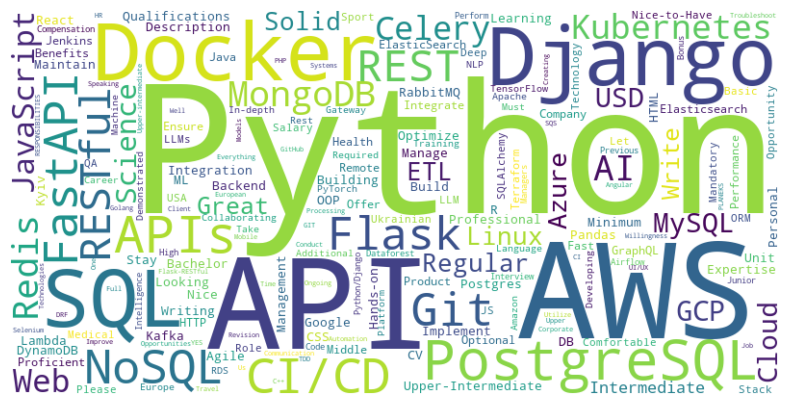

In [9]:
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def process_text(text) -> set[str]:
    
    token_words = word_tokenize(text)

    unique_words = set(word for word in token_words if word[0].isupper() and not any(char.isdigit() for char in word) and not any("а" <= char.lower() <= "я" for char in word))

    unique_words = {word for word in unique_words if word.lower() not in stop_words}
    
    unique_words = {word for word in unique_words if word not in EXCLUSION_WORDS}
    
    return unique_words


all_tokens = [token for sublist in df["description"].apply(process_text) for token in sublist]


word_counts = Counter(all_tokens)

top_technologies = [word for word, count in word_counts.most_common(20)]


for technology in top_technologies:
    df[technology] = df["description"].apply(lambda x: 1 if technology in x else 0)


wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

today = pd.to_datetime("today").strftime("%Y-%m-%d")
filename = f"wordcloud_{today}.png"
plt.savefig(f"graphs-archive/{filename}")
print(f"Wordcloud saved as {filename}")
plt.show()

# 10. Create Plot "20 Most Mentioned Technologies"

Figure saved as techs_count_2024-04-21.png


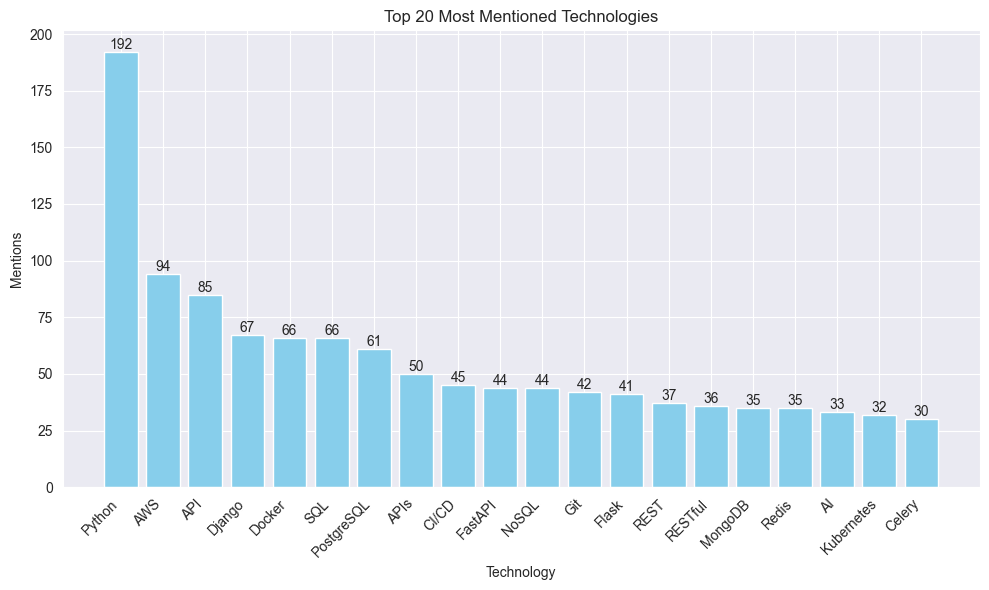

In [10]:
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

top_words = sorted_word_counts[:20]

words = [word[0] for word in top_words]
counts = [word[1] for word in top_words]

plt.figure(figsize=(10, 6))
bars = plt.bar(words, counts, color="skyblue")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height}", ha="center", va="bottom")

plt.xlabel("Technology")
plt.ylabel("Mentions")
plt.title("Top 20 Most Mentioned Technologies")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()


filename = f"techs_count_{today}.png"
plt.savefig(f"graphs-archive/{filename}")
print(f"Figure saved as {filename}")

plt.show()

# 11. Create Correlation Heatmap

Heatmap saved as Correlation_2024-04-21.png


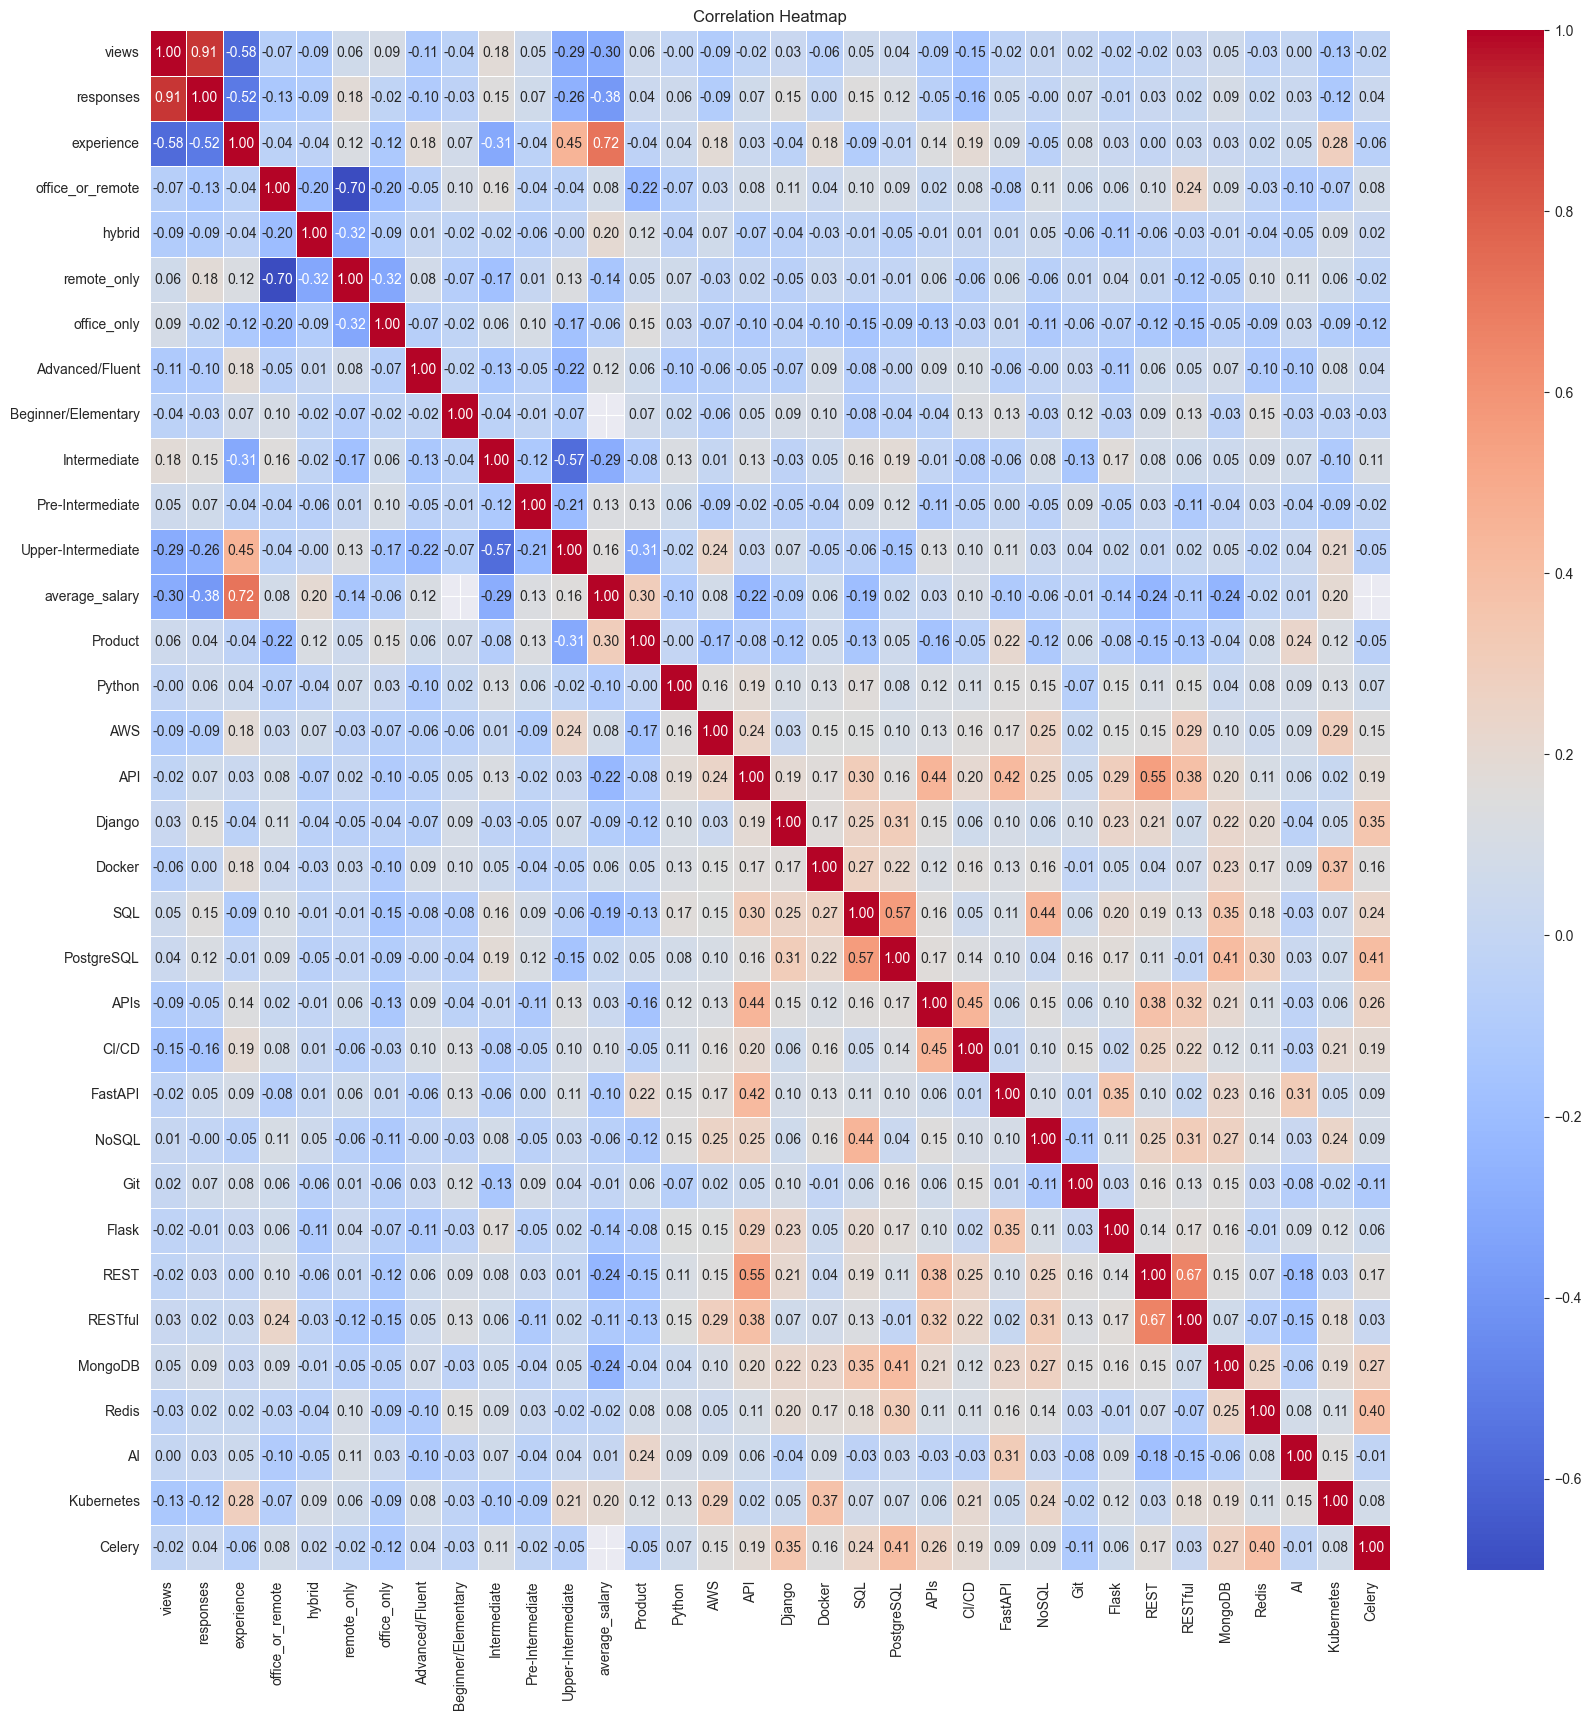

In [11]:
correlation = df.drop(columns=["date", "title", "description", "location", "min_salary", "max_salary"]).corr()


plt.figure(figsize=(20, 20))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")

filename = f"Correlation_{today}.png"
plt.savefig(f"graphs-archive/{filename}")
print(f"Heatmap saved as {filename}")

plt.show()

In [12]:
df

,date,title,location,description,views,responses,experience,office_or_remote,hybrid,remote_only,...,NoSQL,Git,Flask,REST,RESTful,MongoDB,Redis,AI,Kubernetes,Celery
0,2024-04-20 10:50:00,Python Developer - Project based position - Tr...,Італія,"Dear candidate, DuckMa is a mobile development...",295,43,5,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2024-04-19 19:22:00,Junior Python,Україна (Запоріжжя),We are looking for a talented junior Python de...,241,62,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
2,2024-04-19 18:46:00,Python Department Lead,Україна,Unique proposition where you can maximize your...,18,1,5,1,0,0,...,1,0,0,1,1,1,0,0,1,1
3,2024-04-19 17:07:00,Senior Python Developer,Україна,"Company Yojji is seeking a detail-focused, kno...",23,2,5,1,0,0,...,0,1,1,1,0,1,0,0,0,0
4,2024-04-19 16:24:00,Python Middle Developer,Україна,- 3+ years of experience in Django\n- 3+ Djang...,106,32,3,1,0,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,2024-03-21 14:35:00,Senior Python Developer,Україна,If you have:\n7+ years of experience in Python...,50,6,5,1,0,0,...,0,1,1,0,0,1,0,0,1,0
212,2024-03-21 13:47:00,Middle Python Developer,Україна,Mirko Solutions is looking for an experienced ...,446,148,3,0,0,1,...,1,0,1,1,1,0,0,0,1,0
213,2024-03-21 13:44:00,Backend developer,Україна (Київ),"Привіт! Ми команда українських розробників, на...",893,62,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
214,2024-03-21 13:23:00,Python Developer in Test (Apps),"Релокейт, Україна (Київ)",About project:\nAjax is an ecosystem whose wor...,275,21,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
